In [32]:
!pwd

/notebooks/Documents/spb-tf20170205/faces


In [9]:
import cv2
import os
import numpy as np
import skimage
import skimage.io
import skimage.transform

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
images = dict()

In [36]:
for path in os.listdir('.'):
    if '.jpeg' not in path:
        continue
    img = skimage.io.imread(path)
    if len(img.shape) < 3:
        img = skimage.color.gray2rgb(img)
    img = skimage.transform.resize(img, (224, 224, 3)) # * 255
    # images[path] = img
    skimage.io.imsave('out/' + path, img)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     cv2.imwrite('out/' + path, img)

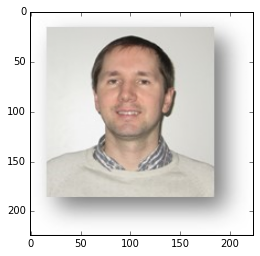

In [37]:
plt.imshow(img)

In [41]:
import cv2
 
num_down = 2       # number of downsampling steps
num_bilateral = 7  # number of bilateral filtering steps
 
img_rgb = img.astype(np.float32)
 
# downsample image using Gaussian pyramid
img_color = img_rgb
for _ in xrange(num_down):
    img_color = cv2.pyrDown(img_color)

# repeatedly apply small bilateral filter instead of
# applying one large filter
for _ in xrange(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9,
                                    sigmaColor=9,
                                    sigmaSpace=7)
# upsample image to original size
for _ in xrange(num_down):
    img_color = cv2.pyrUp(img_color)

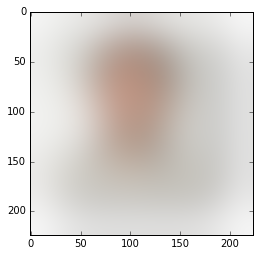

In [42]:
plt.imshow(img_color)

In [40]:
img_rgb.dtype

dtype('float64')